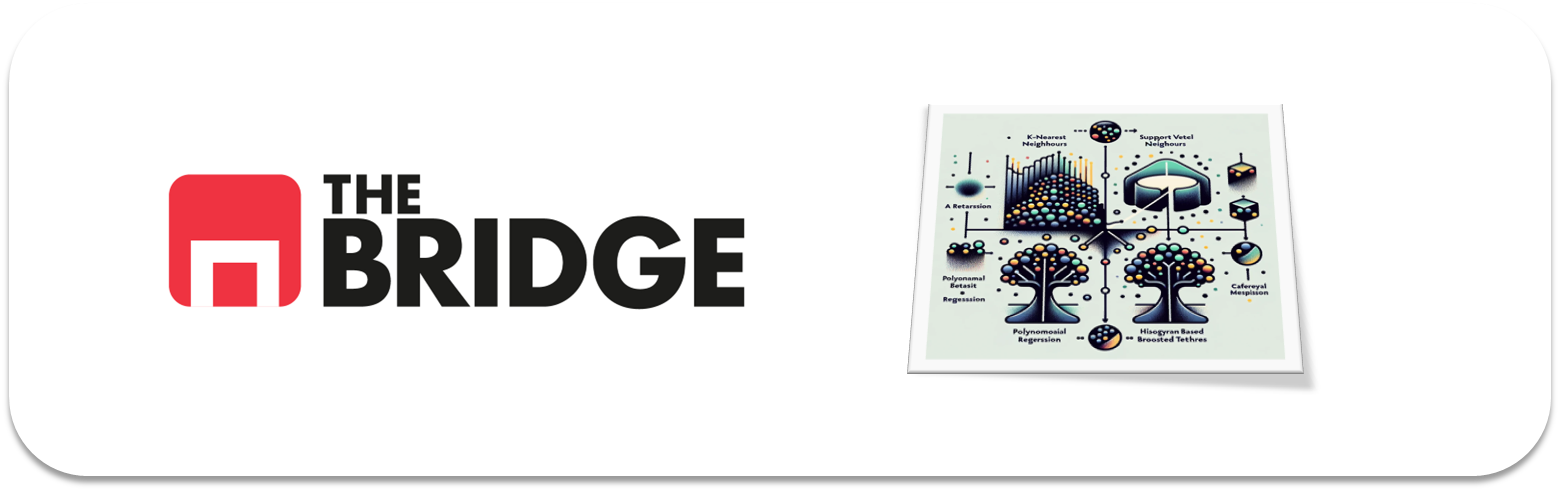

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos ***permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años***. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [150]:
data = pd.read_csv('./data/credit_npo.csv')
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

📏 Número de registros: 12,537

📊 Número de columnas: 11

📌 Target (SeriousDlqin2yrs): Indica si una persona tuvo problemas financieros en los últimos 2 años (binario: 1 = sí, 0 = no).

📉 Variables principales:
* RevolvingUtilizationOfUnsecuredLines: Proporción de uso de crédito no asegurado.
* age: Edad de la persona.
* DebtRatio: Relación deuda/ingreso.
* MonthlyIncome: Ingreso mensual (con valores nulos).
* NumberOfTime30-59DaysPastDueNotWorse / 60-89DaysPastDue / 90DaysLate: Veces que se retrasó en pagos.
* NumberOfOpenCreditLinesAndLoans: Número de líneas de crédito abiertas.
* NumberRealEstateLoansOrLines: Créditos inmobiliarios.
* NumberOfDependents: Número de dependientes (con valores nulos).

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Estamos tratando un problema de clasificación binaria, ya que queremos predecir si una persona tendrá dificultades financieras en los próximos dos años.

🎯 Variable Target:
La variable objetivo es SeriousDlqin2yrs, que toma valores binarios:

1 → La persona tuvo dificultades financieras.

0 → No tuvo dificultades financieras.

### #1.3
Pinta la distribución de frecuencias del target y coméntala

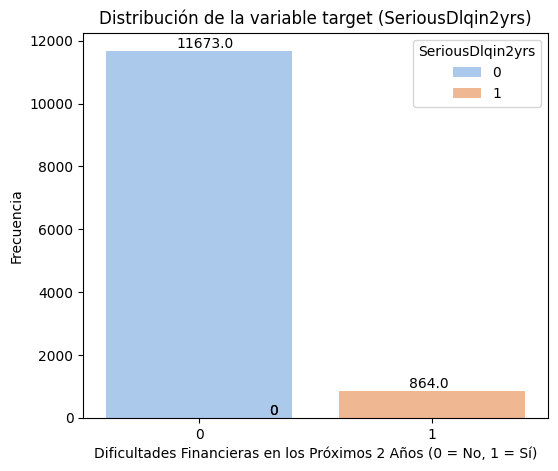

SeriousDlqin2yrs
0    93.108399
1     6.891601
Name: proportion, dtype: float64


In [152]:
# Distribución de la variable target
plt.figure(figsize=(6,5))
sns.countplot(x=data["SeriousDlqin2yrs"], palette="pastel",hue=data["SeriousDlqin2yrs"])

# Añadir etiquetas
plt.title("Distribución de la variable target (SeriousDlqin2yrs)")
plt.xlabel("Dificultades Financieras en los Próximos 2 Años (0 = No, 1 = Sí)")
plt.ylabel("Frecuencia")

# Mostrar valores en las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 100))
plt.show()

# Proporción de cada clase
target_distribution = data["SeriousDlqin2yrs"].value_counts(normalize=True) * 100
print(target_distribution)

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

##### Separar train y test, target y features

In [153]:
# Separar features y target
target = "SeriousDlqin2yrs"
X = data.drop(columns=[target,'MonthlyIncome','NumberOfDependents']) # Se elimina MonthlyIncome y NumberOfDependents por presentar NaN
y = data[target]

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Tratamiento de features

In [154]:
X_train.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
count,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000
mean,0.330685,52.059228,0.384884,1.950129,8.486389,0.229235,0.993120,0.201516
std,0.370456,15.085691,3.714056,9.284826,5.153172,3.689186,1.130784,3.671923
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030323,41.000000,0.000000,0.142167,5.000000,0.000000,0.000000,0.000000
50%,0.163241,51.000000,0.000000,0.303945,8.000000,0.000000,1.000000,0.000000
75%,0.584406,62.000000,0.000000,0.507164,11.000000,0.000000,2.000000,0.000000
max,6.000000,101.000000,98.000000,99.000000,49.000000,98.000000,19.000000,98.000000


<Figure size 1200x800 with 0 Axes>

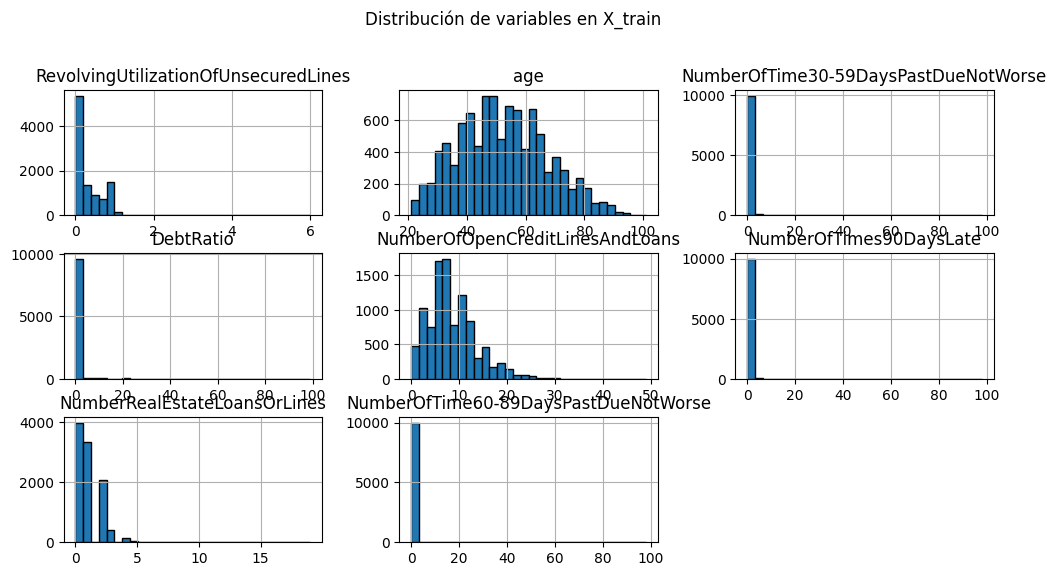

In [155]:
# Análisis de distribución de las variables
plt.figure(figsize=(12, 8))
X_train.hist(bins=30, figsize=(12, 8), layout=(4, 3), edgecolor='black')
plt.suptitle("Distribución de variables en X_train")
plt.show()

In [156]:
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
8818,0.952783,51,4,0.478968,10,0,3,0
4520,1.000000,45,0,0.491605,7,0,1,0
337,0.538922,33,0,0.089734,3,0,0,0
12501,0.036962,46,0,0.322784,7,0,1,0
8837,0.089869,42,1,0.091979,3,0,1,0
...,...,...,...,...,...,...,...,...
12390,0.042309,44,0,0.205981,11,0,3,0
10382,0.227732,69,0,0.655826,8,0,1,0
5907,0.577547,57,0,0.865273,13,0,1,0
2165,0.926410,31,0,0.471008,3,0,0,0


In [157]:
# Transformación logarítmica de todas las variables excepto 'age'
X_train_transformed = X_train.copy()
X_test_transformed = X_test.copy()

for col in X_train.columns:
    if col != 'age':
        X_train_transformed[col] = X_train_transformed[col].apply(np.log1p)
        X_test_transformed[col] = X_test_transformed[col].apply(np.log1p)

In [158]:
X_train_transformed

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
8818,0.669256,51,1.609438,0.391345,2.397895,0.0,1.386294,0.0
4520,0.693147,45,0.000000,0.399853,2.079442,0.0,0.693147,0.0
337,0.431082,33,0.000000,0.085934,1.386294,0.0,0.000000,0.0
12501,0.036295,46,0.000000,0.279739,2.079442,0.0,0.693147,0.0
8837,0.086058,42,0.693147,0.087992,1.386294,0.0,0.693147,0.0
...,...,...,...,...,...,...,...,...
12390,0.041438,44,0.000000,0.187293,2.484907,0.0,1.386294,0.0
10382,0.205168,69,0.000000,0.504300,2.197225,0.0,0.693147,0.0
5907,0.455871,57,0.000000,0.623407,2.639057,0.0,0.693147,0.0
2165,0.655658,31,0.000000,0.385948,1.386294,0.0,0.000000,0.0


In [159]:
# Estandarización de las variables
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_transformed), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_transformed), columns=X_test.columns)

In [160]:
X_train_scaled.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
count,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04
mean,-1.082216e-16,-5.738754e-17,4.817719e-17,-9.918834e-18,5.933588e-16,-9.918834e-18,7.332852e-17,2.833952e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-9.997589e-01,-2.058956e+00,-3.870193e-01,-6.077475e-01,-3.427721e+00,-1.985685e-01,-1.101964e+00,-1.854473e-01
25%,-8.812348e-01,-7.331305e-01,-3.870193e-01,-4.128377e-01,-4.870781e-01,-1.985685e-01,-1.101964e+00,-1.854473e-01
50%,-3.998107e-01,-7.021760e-02,-3.870193e-01,-2.186041e-01,1.783729e-01,-1.985685e-01,2.688619e-01,-1.854473e-01
75%,8.261956e-01,6.589866e-01,-3.870193e-01,-6.233796e-03,6.505178e-01,-1.985685e-01,1.070744e+00,-1.854473e-01
max,6.720946e+00,3.244347e+00,1.161444e+01,6.144741e+00,2.992707e+00,1.612848e+01,4.822648e+00,1.829044e+01


In [161]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10029 entries, 0 to 10028
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  10029 non-null  float64
 1   age                                   10029 non-null  float64
 2   NumberOfTime30-59DaysPastDueNotWorse  10029 non-null  float64
 3   DebtRatio                             10029 non-null  float64
 4   NumberOfOpenCreditLinesAndLoans       10029 non-null  float64
 5   NumberOfTimes90DaysLate               10029 non-null  float64
 6   NumberRealEstateLoansOrLines          10029 non-null  float64
 7   NumberOfTime60-89DaysPastDueNotWorse  10029 non-null  float64
dtypes: float64(8)
memory usage: 626.9 KB


##### Comparar 3 modelos con CV, scoring = recall

In [162]:
# Definir modelos
models = {
    "Base (Regresión Logística)": LogisticRegression(class_weight='balanced', max_iter=500, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='distance'),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "CatBoost": CatBoostClassifier(depth=5, auto_class_weights='Balanced', random_state=42, verbose=0)
}

# Evaluación con validación cruzada
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='balanced_accuracy')
    cv_results[name] = np.mean(scores)
    print(f"{name} - Recall Medio (Validación Cruzada): {np.mean(scores):.4f}")

Base (Regresión Logística) - Recall Medio (Validación Cruzada): 0.7725
KNN - Recall Medio (Validación Cruzada): 0.5756
Random Forest - Recall Medio (Validación Cruzada): 0.7702
CatBoost - Recall Medio (Validación Cruzada): 0.7435


#### Optimización del modelo de regresión logística

In [163]:
# Optimización de hiperparámetros para la regresión logística
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2", "elasticnet"],
    "solver": ["liblinear", "saga", "newton-cg", "lbfgs"],
    "max_iter": [500, 1000, 2000]
}

log_reg = LogisticRegression(class_weight='balanced', random_state=42)

# Definir el grid
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1)

# Ajustar el modelo
grid_search.fit(X_train_scaled, y_train)

# Descripción del mejor modelo
best_model = grid_search.best_estimator_
print(f"\nMejores hiperparámetros encontrados: {grid_search.best_params_}")


Mejores hiperparámetros encontrados: {'C': 0.1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}


c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\maria\App

##### Entrenar el modelo optimizado


Reporte de clasificación en test:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      2335
           1       0.21      0.73      0.33       173

    accuracy                           0.79      2508
   macro avg       0.59      0.77      0.60      2508
weighted avg       0.92      0.79      0.84      2508


Errores de clasificación: 46 FN, 474 FP


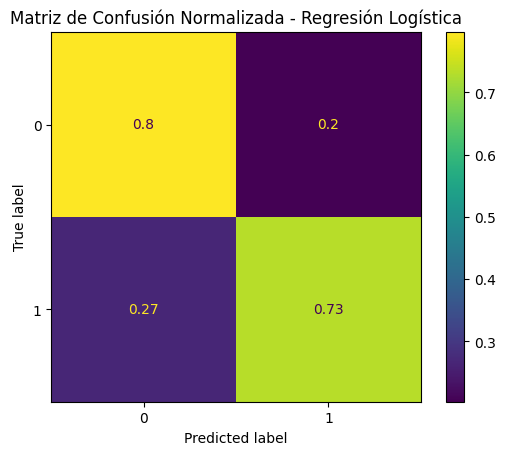

In [164]:
# Predecir
test_preds = best_model.predict(X_test_scaled)

# Evaluación final
print("\nReporte de clasificación en test:")
print(classification_report(y_test, test_preds))

# Análisis de errores
false_negatives = (y_test == 1) & (test_preds == 0)
false_positives = (y_test == 0) & (test_preds == 1)
print(f"\nErrores de clasificación: {sum(false_negatives)} FN, {sum(false_positives)} FP")

# Mostrar el recall por clase en la matriz de confusión
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize="true")
plt.title("Matriz de Confusión Normalizada - Regresión Logística")
plt.show()


#### Optimización del modelo de RF Classifier

In [ ]:
# Optimización de hiperparámetros para Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": ["balanced", "balanced_subsample"]
}

rf_model = RandomForestClassifier(random_state=42)

# Definir el grid
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='balanced_accuracy', n_jobs=-1)

# Ajustar el modelo
grid_search_rf.fit(X_train_scaled, y_train)

# Mejor modelo y resultados
best_rf_model = grid_search_rf.best_estimator_
print(f"\nMejores hiperparámetros encontrados para Random Forest: {grid_search_rf.best_params_}")


Mejores hiperparámetros encontrados para Random Forest: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


##### Entrenar el modelo optimizado


Reporte de clasificación en test:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      2335
           1       0.22      0.74      0.33       173

    accuracy                           0.80      2508
   macro avg       0.60      0.77      0.61      2508
weighted avg       0.92      0.80      0.84      2508


Errores de clasificación: 45 FN, 464 FP


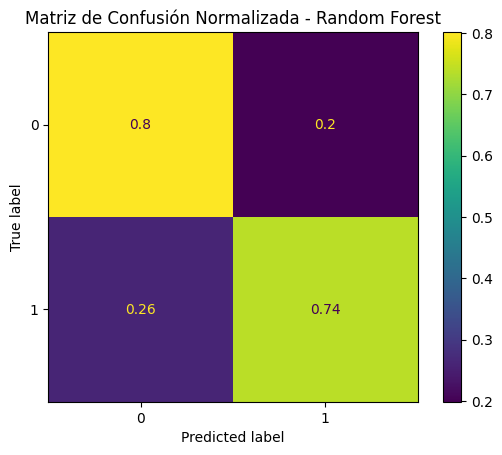

In [148]:
# Predecir con el modelo optimizado
test_preds_rf = best_rf_model.predict(X_test_scaled)

# Evaluación final
print("\nReporte de clasificación en test:")
print(classification_report(y_test, test_preds_rf))

# Análisis de errores
false_negatives = (y_test == 1) & (test_preds_rf == 0)
false_positives = (y_test == 0) & (test_preds_rf == 1)
print(f"\nErrores de clasificación: {sum(false_negatives)} FN, {sum(false_positives)} FP")

# Mostrar el recall por clase en la matriz de confusión
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, test_preds_rf, normalize="true")
plt.title("Matriz de Confusión Normalizada - Random Forest")
plt.show()